In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Machine learning algorithms
from sklearn.svm import SVR #Support vector machine

# Cross-validation
'''
GridSearchCV = Perform an optimization of the parameters. 可以保证在指定的参数范围内找到精度最高的参数
                1. search for the best parameters for model; 
                2. automatically fit a new model on the training dataset w/ the parameters that 
                    can yield the best cross-validation performance.
cross_val_score = to implement cross-validation in scikit-learn.
PS: When an integer is passed to the cv parameter of cross_val_score():
        cv=int (same as cv=StratifiedKFold(n_splits=int)) is used if the estimator is a classifier 
        and y is either binary or multiclass; In all other cases, KFold is used.
        i.e. 写int=10会自动转换为KFold(n_splits=10),不会转换为StratifiedKFold(n_splits=10)。
'''
from sklearn.model_selection import GridSearchCV, cross_val_score

path = os.getcwd()#get current path
path_up1Dir = os.path.dirname(path)#go up one directory
dataset = pd.read_excel(path_up1Dir +'/y_MVPA/y_MVPA.xlsx')#to import the preprocessed dataset into a variable

# print(dataset)

In [2]:
X = pd.DataFrame(dataset.iloc[:,4:9])
y = pd.DataFrame(dataset.iloc[:,9])
other = pd.DataFrame(dataset.iloc[:,:4])

In [4]:
# Support Vector Machine
'''
Hyper-parameters are parameters that are not directly learnt within estimators. 
    In scikit-learn they are passed as arguments to the constructor of the estimator classes. 
    Typical examples include C, kernel and gamma for Support Vector Classifier.
# kernel = Specifies the kernel type to be used in the algorithm. 
    It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. 
    If none is given, ‘rbf’ will be used. If a callable is given it is used to precompute the kernel matrix.
# C = Regularization parameter. The strength of the regularization is inversely proportional to C. 
    Must be strictly positive. The penalty is a squared l2 penalty.
# gamma = Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
    if ‘auto’, uses 1 / n_features.
'''

# Set param_grid, aka the main parameters in RandomForestRegressor
param_grid_SVR = [
                {'kernel': ['linear'],
                 'C': np.logspace(0,3,4),
                 'coef0': np.linspace(0,5,10)
                 },
                {'kernel': ['rbf'],
                 'gamma': np.logspace(-10,1,20),
                 'C': np.logspace(0,3,4),
                 'coef0': np.linspace(0,5,10)
                 },
            ]

# GridSearchCV
svr = GridSearchCV(estimator=SVR(), # algorithm - AdaBoost Regressor
                    param_grid=param_grid_SVR, # specify the parameters to search over using a dict or list of dictionaries
                    cv=10, # 10-Fold
                   scoring='r2'
                    )

# Build the model, aka training the dataset
svr.fit(X, y.values.ravel())

# Output the best parameter, cross-validation score, estimator, and the index of best estimator.
print("\n------------------ SVR Model")
print("Best parameter: {}".format(svr.best_params_))
print("Best score in r2: {:.2f}".format(svr.best_score_))
print("Average score in 10-Fold: \n", svr.cv_results_['mean_test_score'])
print("Std score in 10-Fold: \n", svr.cv_results_['std_test_score'])
print("Best estimator: {}".format(svr.best_estimator_))
print("The Index of Best estimator: {}".format(svr.best_index_))


------------------ SVR Model
Best parameter: {'C': 1000.0, 'coef0': 0.0, 'gamma': 7.847599703514623e-08, 'kernel': 'rbf'}
Best score in r2: -0.16
Average score in 10-Fold: 
 [-0.17995256 -0.17995256 -0.17995256 -0.17995256 -0.17995256 -0.17995256
 -0.17995256 -0.17995256 -0.17995256 -0.17995256 -0.18027826 -0.18027826
 -0.18027826 -0.18027826 -0.18027826 -0.18027826 -0.18027826 -0.18027826
 -0.18027826 -0.18027826 -0.17992005 -0.17992005 -0.17992005 -0.17992005
 -0.17992005 -0.17992005 -0.17992005 -0.17992005 -0.17992005 -0.17992005
 -0.1791522  -0.1791522  -0.1791522  -0.1791522  -0.1791522  -0.1791522
 -0.1791522  -0.1791522  -0.1791522  -0.1791522  -0.1661069  -0.16610695
 -0.16610676 -0.16606941 -0.16614276 -0.16614222 -0.16607479 -0.16609088
 -0.16614877 -0.16580405 -0.16453256 -0.16435051 -0.16841409 -0.17532859
 -0.18273944 -0.19261849 -0.20347501 -0.27179056 -0.26883788 -0.2207487
 -0.1661069  -0.16610695 -0.16610676 -0.16606941 -0.16614276 -0.16614222
 -0.16607479 -0.16609088

In [7]:
'''
机器学习不同于统计建模，有些定义不一样。sklearn这个包定义的比较奇怪而已。
https://zhuanlan.zhihu.com/p/369330147，score接近于1越好的是R2这个指标，其他的指标是接近于0越好。把负数去掉即可。
'''
# 10-Fold Cross-validation to check its accuracy again
score = cross_val_score(estimator=SVR(C=1000.0, coef0=0.0, gamma=7.847599703514623e-08, kernel='rbf'),
                        X=X, y=y.values.ravel(),
                        cv=10
                       )
print(score)

[-0.09389755 -0.03866371 -0.08589724 -0.01044642 -0.72984597 -0.17970129
 -0.17312375 -0.10923128 -0.12527949 -0.09533349]


In [9]:
# Use the above optimal parameters to build new model, aka training the dataset
svr = SVR(C=1000.0, coef0=0.0, gamma=7.847599703514623e-08, kernel='rbf').fit(X, y.values.ravel())

In [10]:
yhat = svr.predict(X)

In [11]:
from sklearn.metrics import mean_squared_error as MSE
MSE(y_true=y, y_pred=yhat)

1.0962530871680556

In [12]:
#调用R2
from sklearn.metrics import r2_score
r2_score(yhat,y)

-4691.75674507294

In [13]:
r2 = svr.score(X,y)
r2

-0.09625308716805558

In [14]:
r2_score(y_true=y, y_pred=yhat)

-0.09625308716805558

In [15]:
cross_val_score(svr,X,y.values.ravel(),cv=10,scoring="r2").mean()

-0.16414201754810578

In [16]:
import matplotlib.pyplot as plt
y = dataset['MVPA']
sorted(y)

[-0.8146810918277586,
 -0.8146810918277586,
 -0.8146810918277586,
 -0.8146810918277586,
 -0.8146810918277586,
 -0.8146810918277586,
 -0.8146810918277586,
 -0.8146810918277586,
 -0.8146810918277586,
 -0.8146810918277586,
 -0.8146810918277586,
 -0.8146810918277586,
 -0.7849064233500156,
 -0.7849064233500156,
 -0.7849064233500156,
 -0.7849064233500156,
 -0.7700190891111441,
 -0.7700190891111441,
 -0.7700190891111441,
 -0.7700190891111441,
 -0.7551317548722726,
 -0.7551317548722726,
 -0.7551317548722726,
 -0.7551317548722726,
 -0.7551317548722726,
 -0.7551317548722726,
 -0.7551317548722726,
 -0.7551317548722726,
 -0.7402444206334011,
 -0.7402444206334011,
 -0.7402444206334011,
 -0.7402444206334011,
 -0.7402444206334011,
 -0.7402444206334011,
 -0.7402444206334011,
 -0.7328007535139653,
 -0.7328007535139653,
 -0.7328007535139653,
 -0.7328007535139653,
 -0.7253570863945296,
 -0.7253570863945296,
 -0.7253570863945296,
 -0.7253570863945296,
 -0.7253570863945296,
 -0.7253570863945296,
 -0.725357

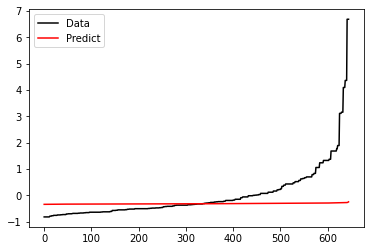

In [17]:
plt.plot(range(len(y)),sorted(y),c="black",label= "Data")
plt.plot(range(len(yhat)),sorted(yhat),c="red",label = "Predict")
plt.legend()
plt.show()